<a href="https://colab.research.google.com/github/jacobrgardner/CIS5200_Fall2023/blob/main/homework0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 5200: Machine Learning
## Homework 0

In [1]:
import os
import sys

# For autograder only, do not modify this cell.
# True for Google Colab, False for autograder
NOTEBOOK = (os.getenv('IS_AUTOGRADER') is None)
if NOTEBOOK:
    print("[INFO, OK] Google Colab.")
else:
    print("[INFO, OK] Autograder.")
    sys.exit()

[INFO, OK] Google Colab.


### Penngrader setup

In [2]:
# %%capture
!pip install penngrader-client

In [3]:
%%writefile config.yaml
grader_api_url: 'https://23whrwph9h.execute-api.us-east-1.amazonaws.com/default/Grader23'
grader_api_key: 'flfkE736fA6Z8GxMDJe2q8Kfk8UDqjsG3GVqOFOa'

Overwriting config.yaml


In [4]:
from penngrader.grader import PennGrader

# PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO
# TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 17994725 # YOUR PENN-ID GOES HERE AS AN INTEGER #
SECRET = STUDENT_ID

grader = PennGrader('config.yaml', 'cis5200_sp25_HW0', STUDENT_ID, SECRET)

PennGrader initialized with Student ID: 17994725

Make sure this correct or we will not be able to store your grade


In [5]:
from dill.source import getsource

# PyTorch - Basics

Programming assignments will be primarily done in PyTorch. If you've used NumPy before, then you'll find that PyTorch has many of the same functionalities plus more.

The base object in PyTorch is the Tensor. See this tutorial for a brief primer on the syntax: https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html

In [6]:
import torch

# Creating a random tensor
A = torch.randn(5,6)
print("Random tensor:",A)

# Common ways to create tensors
x = torch.tensor([1, 2, 3])     # From list
print("From list:", x)
y = torch.zeros(2, 3)           # All zeros
print("All zeros:\n", y)
z = torch.ones(2, 3)            # All ones
print("All ones:\n", z)

Random tensor: tensor([[ 1.2891, -1.6442,  1.9408,  0.0456,  1.5346, -1.1542],
        [-0.0539, -0.7659, -1.0041,  2.1362, -1.1751, -0.0830],
        [-0.3179,  1.6823,  0.2592, -0.3508, -0.6097, -0.4364],
        [ 0.5026, -0.8261,  1.4705,  0.4547,  0.4454, -1.4544],
        [-0.8199,  0.4894,  0.1891,  0.0488, -0.7899, -0.2547]])
From list: tensor([1, 2, 3])
All zeros:
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
All ones:
 tensor([[1., 1., 1.],
        [1., 1., 1.]])



Nearly all low-level functions are already implemented in PyTorch. *Check the documentation before implementing anything yourself*: https://pytorch.org/docs/stable/index.html

Many functions are built-in to the `torch.Tensor` object. For example, instead of calling `torch.sum(X)`, you can call `X.sum()` directly. Some of these functions such as `matmul`, `mm`, or `dot` will be useful for implementing matrix operations. A full list of tensor operations can be found here: https://pytorch.org/docs/stable/tensors.html

In [7]:
A = torch.randn(5,6)

print("Sum along rows:", A.sum(dim=0).shape)    # Reduce along rows
print("Mean along columns:", A.mean(dim=1).shape)  # Reduce along columns
print("Matrix transpose:", A.t().shape)         # Transpose

B = torch.randn(6,2)

print("Matrix multiplication using mm():")
print(A.mm(B))

Sum along rows: torch.Size([6])
Mean along columns: torch.Size([5])
Matrix transpose: torch.Size([6, 5])
Matrix multiplication using mm():
tensor([[-1.0741,  2.0154],
        [ 0.4365,  0.1983],
        [-0.4833, -0.0559],
        [ 0.9655, -0.4394],
        [ 0.5581, -3.0524]])


PyTorch will raise helpful error messages when operations fail. Understanding these common errors will help you debug your code more effectively:


In [8]:
# Example 1: Matrix multiplication shape mismatch
A = torch.randn(5,6)
B = torch.randn(5,2)  # Wrong shape for multiplication with A
try:
    print(A.mm(B))
except RuntimeError as e:
    print("Matrix multiplication error:")
    print(e)
    print("\nTo fix this, B should have shape (6,2):")
    B_fixed = torch.randn(6,2)
    print(A.mm(B_fixed))

# Example 2: Broadcasting dimension mismatch
X = torch.randn(5,6)
Y = torch.randn(5,1)
try:
    print(X + Y)
except RuntimeError as e:
    print("\nBroadcasting error:")
    print(e)
    print("\nTo fix this, expand Y to match X's dimensions:")
    print(X + Y.expand(-1,6))

Matrix multiplication error:
mat1 and mat2 shapes cannot be multiplied (5x6 and 5x2)

To fix this, B should have shape (6,2):
tensor([[-5.3412,  2.8263],
        [-1.6910, -0.4778],
        [ 0.2097,  0.8461],
        [ 0.7392, -1.3774],
        [ 4.6957, -1.8498]])
tensor([[-1.8961, -0.7561, -2.5498, -0.7241,  0.0287, -0.9788],
        [-0.0945, -0.2363,  1.0649,  1.9347,  1.5209, -0.4067],
        [-0.7558, -3.3834,  0.1174, -0.8711, -0.8175, -1.8162],
        [-1.4497,  0.0272,  1.1504,  1.2684,  0.0465,  0.7324],
        [ 0.6010, -0.2948,  1.7397, -0.0599,  0.5585,  1.2513]])


These errors commonly occur when implementing matrix operations. Keep tensor shapes in mind when writing your gradient implementations in the following section.

PyTorch has a fairly extensive distributions library, which allows you to generate samples, compute probabilities, and other statistical quantities.

In this example we can construct a Bernoulli random variable with parameter $p=0.8$ and calculate the log probability of the following observations `[1,0,0,1,1]`.

In [9]:
from torch.distributions.bernoulli import Bernoulli

X = Bernoulli(0.8)
print(X.log_prob(torch.Tensor([1,0,0,1,1])))

tensor([-0.2231, -1.6094, -1.6094, -0.2231, -0.2231])


PyTorch provides manyother probability distributions in `torch.distributions` that are commonly used in machine learning, such as:
- `Normal` (Gaussian)
- `Categorical` (for discrete classes)
- `MultivariateNormal` (for correlated variables)
- `Uniform`

Each distribution supports common operations like `sample()` and `log_prob()`. See the [PyTorch distributions documentation](https://pytorch.org/docs/stable/distributions.html) for a complete list of available distributions and their usage.

The sampling exercise at the end of this homework will use `MultivariateNormal` to generate correlated 2D samples.

# Matrix operations
Let $X\in \mathbb R^{m\times n}$ be a data matrix of $m$ samples with $n$ features. Implement the batched sample gradient, $\nabla_X f(X)$, for each of the calculus problems from the written homework. The batched sample gradient is the $m\times n$ matrix where the $i$ th row is the gradient of $f$ with respect to the $i$ th sample.

1. $f(x_i;w) = w^\top x_i$
2. $f(x_i) = x_i^\top x_i$
3. $f(x_i,y_i;w) = (y_i-w^\top x_i)^2$
4. $f(x_i,y_i;w) = \log(1 + \exp(-y_iw^\top x_i))$
5. $f(x_i;A) = x_i^\top Ax_i$

Do so using matrix operations without any for loops. As an example, the first one has been done for you.

In [10]:
import torch

def grad1(X, w):
    # X := Tensor of size (m,n)
    # w := Tensor of size (n,)
    # Return := Tensor of size (m,n)
    m = X.size(0)
    return w.repeat(m,1)

def grad2(X):
    # X := Tensor of size (m,n)
    # Return := Tensor of size (m,n)
    return 2*X

def grad3(X, y, w):
    # X := Tensor of size (m,n)
    # y := Tensor of size (m,)
    # w := Tensor of size (n,)
    # Return := Tensor of size (m,n)
    return -2 * (y.unsqueeze(1)-(X.mm(w.unsqueeze(1)))) * w.unsqueeze(1).t()

def grad4(X, y, w):
    # X := Tensor of size (m,n)
    # y := Tensor of size (m,)
    # w := Tensor of size (n,)
    # Return := Tensor of size (m,n)
    gx = (X.mm(w.unsqueeze(1))).squeeze()*y
    return -(1/(1+torch.exp(gx))*y).unsqueeze(1)*w

def grad5(X, A):
    # X := Tensor of size (m,n)
    # A := Tensor of size (n, n)
    # Return := Tensor of size (m,n)
    return X.mm(A+A.t())

Some variables other than $X$ can also be batched, such as sample labels $Y \in \mathbb R^{m}$. For such functions, the $i$th sample gradient of these examples is taken with respect to the sample $x_i$ using the sample label $y_i$: $\nabla_{x_i} f(x_i,y_i)$.

### Why avoid loops?
PyTorch (like NumPy) is optimized for vectorized operations - operations that work on entire arrays/matrices at once. Using loops to process elements one at a time is:
1. Much slower: Vectorized operations are implemented in highly optimized C/CUDA code
2. Less readable: Matrix operations express the mathematical intent more clearly
3. Less efficient: Loops can create many temporary intermediate objects

Let's look at an example:

In [11]:
import time

# Create sample data
X = torch.randn(1000, 5)  # 1000 samples, 5 features
w = torch.randn(5)        # 5 weights

# Slow way with loops
start_time = time.time()
result_loop = torch.zeros(X.shape[0])
for i in range(X.shape[0]):
    result_loop[i] = torch.dot(w, X[i])
loop_time = time.time() - start_time

# Fast way with matrix multiplication
start_time = time.time()
result_matrix = torch.matmul(X, w)  # Using matmul instead of grad1
matrix_time = time.time() - start_time

print(f"Loop version took: {loop_time:.4f} seconds")
print(f"Matrix version took: {matrix_time:.4f} seconds")
print(f"Speed improvement: {loop_time/matrix_time:.1f}x faster")

# Verify both give same result
print("\nBoth versions give same result:",
      torch.allclose(result_loop, result_matrix))

Loop version took: 0.0020 seconds
Matrix version took: 0.0000 seconds
Speed improvement: 50.6x faster

Both versions give same result: True


This will become more important when we start working with larger datasets, and runtime becomes a bottleneck for Penngrader.


### Debugging Matrix Operations

When implementing gradients, common bugs include shape mismatches and incorrect broadcasting. Here's how to debug your implementations:

In [12]:
 # Example: Debugging gradient implementation
def debug_gradient(X, w):
    """Helper function to debug gradient implementations"""
    print("Input shapes:")
    print(f"X shape: {X.shape}")  # Should be (m,n)
    print(f"w shape: {w.shape}")  # Should be (n,)

    # Try computing the gradient
    try:
        # Use grad1 function for gradient computation
        grad = grad1(X, w)  # Shape should be (m,n)
        print("\nGradient shape:", grad.shape)

        # Verify gradient shape matches input
        assert grad.shape == X.shape, f"Gradient shape {grad.shape} doesn't match input shape {X.shape}"

        # Check for NaN values
        if torch.isnan(grad).any():
            print("Warning: Gradient contains NaN values!")

        return grad

    except RuntimeError as e:
        print("\nError in gradient computation:")
        print(e)
        print("\nTip: Check matrix dimensions and broadcasting rules")
        return None

# Example usage
X = torch.randn(5, 3)  # 5 samples, 3 features
w = torch.randn(3)     # weights for 3 features

print("Correct case:")
debug_gradient(X, w)

print("\nError case:")
w_wrong = torch.randn(4)  # Wrong dimension
# debug_gradient(X, w_wrong)

Correct case:
Input shapes:
X shape: torch.Size([5, 3])
w shape: torch.Size([3])

Gradient shape: torch.Size([5, 3])

Error case:


Common debugging tips for gradient implementations:

1. Print shapes of all tensors involved
2. Use `assert` statements to verify tensor shapes
3. Check for NaN values using `torch.isnan()`
4. Break down complex operations into steps
5. Verify your implementation with small test cases

You can use the debug_gradient function as a template for debugging your own implementations.

## Test your implementations

In [13]:
for i in range(1,6):
    print(f"Testing grad{i}")
    grader.grade(test_case_id = f'grad{i}_test', answer = getsource(locals()[f'grad{i}']))

Testing grad1
Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.
Testing grad2
Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.
Testing grad3
Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.
Testing grad4
Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.
Testing grad5
Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Dataset Statistics and Normalization

Let $X\in \mathbb R^{m\times n}$ be a data matrix containing $m$ samples, where each sample has $n$ features.

Your task is to implement key statistical operations on this dataset:

1. **Feature-wise Mean**: Calculate the unbiased sample mean for each feature $j$

2. **Feature-wise Variance**: Calculate the unbiased sample variance for each feature $j$.

3. **Data Normalization**: Transform the data matrix to have zero mean and unit variance for each feature

These operations are fundamental for:
- Ensuring features are on comparable scales
- Improving numerical stability in optimization
- Meeting assumptions of many machine learning algorithms

Important: Implement all operations without using for loops - use PyTorch's vectorized operations instead!

In [14]:
def stat1(X):
    # Calculate the unbiased sample mean for each feature of the data matrix X.
    # The ith entry in the returned tensor should have the sample mean of the
    # ith feature.
    # X := Tensor of size (m,n)
    # Return := Tensor of size (n,)
    return torch.mean(X, dim=0)

def stat2(X):
    # Calculate the unbiased sample variance for each feature of the data
    # matrix X. The ith entry in the returned tensor should have the unbiased
    # sample variance of the ith feature
    # X := Tensor of size (m,n)
    # Return := Tensor of size (n,)
    return torch.var(X, dim=0, unbiased=True)

def stat3(X):
    # Normalize the data matrix X. The ijth entry in the returned tensor should
    # have the normalized entry of X[i,j].
    stat1 = torch.mean(X, dim=0)
    stat2 = torch.var(X, dim=0, unbiased=True)
    return (X-stat1)/torch.sqrt(stat2)

## Test your implementations

In [15]:

for i in range(1,4):
    print(f"Testing stat{i}")
    grader.grade(test_case_id = f'stat{i}_test', answer = getsource(locals()[f'stat{i}']))

Testing stat1
Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.
Testing stat2
Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.
Testing stat3
Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# Sampling and plotting

Draw samples from a 2D multivariate Gaussian with mean $\mu=[-1,2]$ and covariance matrix $\Sigma=\left[\begin{array}{cc} 1 & 2 \\ 2 & 5\end{array}\right]$.

Then, plot this data using matplotlib. The plotting is not autograded, but you can compare your result with the image at the end of this notebook.

In [18]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

def sample(n):
    # Draw samples from a 2D Gaussian with the given parameters. The ith row of
    # the output should have a drawn sample.
    # Return := Tensor of size (n,2)
    mean = torch.Tensor([-1, 2])
    cov = torch.Tensor([[1, 2], [2, 5]])
    return torch.distributions.MultivariateNormal(mean, cov).sample((n,))

def plot(X):
    # Plot data from the given matrix. Each row in X is a data point with 2
    # features to be plotted.
    # X := Tensor of size (m,2)
    plt.scatter(X[:,0], X[:,1])
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.title('2D Multivariate Gaussian Samples')
    plt.savefig('Q4.png', 
            dpi=300,
            bbox_inches='tight',
            format='png',
            transparent=False)
    plt.show()

## Test your implementations

In [19]:
grader.grade(test_case_id = 'sample_test', answer = getsource(sample))

Correct! You earned 1/1 points. You are a star!

Your submission has been successfully recorded in the gradebook.


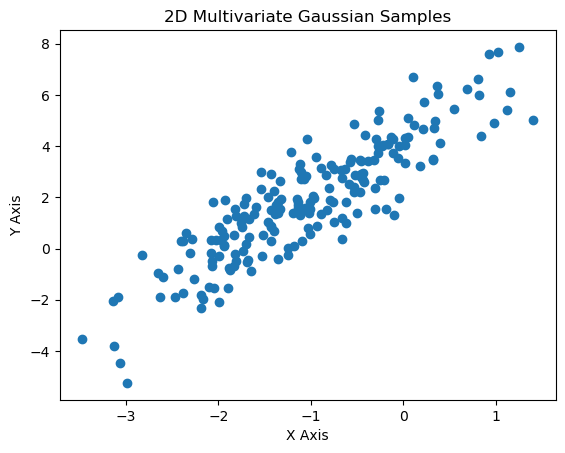

In [22]:
plot(sample(200))

Plotting the data sampled from the previous problem should show something like this:

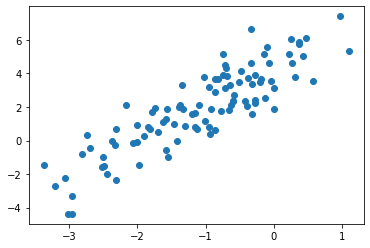

# Submitting to Gradescope
Before submitting to Gradescope, make sure that selecting "Runtime" -> "Restart and run all" completes all cells without errors.

1. Go to the File menu and choose "Download .ipynb" and also "Download .py". Make sure these files are named homework0.ipynb and homework0.py, respectively
2. Go to GradeScope through the canvas page and ensure your class is "BAN_CIS-5200 202510"
3. Select Homework 0
4. Upload both files
5. PLEASE CHECK THE AUTOGRADER OUTPUT TO ENSURE YOUR SUBMISSION IS PROCESSED CORRECTLY!
You should be set! This assignment is autograded to give you feedback, but is not worth any points. However, completion of this assignment is required to pass the course.